In [ ]:
#!pip install wordcloud

In [1]:
import pandas as pd
import numpy as np
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer 
import spacy

import en_core_web_lg
nlp = en_core_web_lg.load()

from wordcloud import WordCloud

from sklearn.decomposition import LatentDirichletAllocation
from sklearn.feature_extraction.text import CountVectorizer


In [49]:
df = pd.read_csv('review123.csv')
df.head()

,Unnamed: 0,review,date,restaurants
0,5,I heard about Coco Pazzo on foodbabynys Instag...,12/27/2018,coco-pazzo-new-york-6
1,7,I LOVED Coco Pazzo. Intimate: romantic: and go...,12/2/2018,coco-pazzo-new-york-6
2,8,My husband and I ate here for the first time t...,12/3/2018,coco-pazzo-new-york-6
3,10,This place may be pretty pricey: but the lunch...,10/8/2018,coco-pazzo-new-york-6
4,11,The food was great and the space is modern and...,11/17/2018,coco-pazzo-new-york-6


In [60]:
df_ny = pd.read_csv('ny_review.csv', encoding='latin1')
df_ny.head()

,ny_review,date,restaurants
0,I can count on Peter Luger Steak House in Broo...,10/29/2019,peter-luger-brooklyn-2
1,Something seems to be going wrong at Bluebird ...,12/18/2018,bluebird-london-nyc-new-york-4
2,"Like many habits, the pursuit of good sushi ca...",3/21/2017,sugarfish-by-sushi-nozawa-new-york
3,Tsismis is the opposite of a speakeasy. It isn...,10/22/2019,tsismis-new-york
4,"Over the years, I have eaten many bowls of pas...",10/15/2019,babs-new-york


In [61]:
#import nltk for text preprocessing
import nltk

#import libraries needed for text preprocessing
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('averaged_perceptron_tagger')
from nltk.corpus import stopwords
import re
import string
from nltk.stem import WordNetLemmatizer
from nltk import word_tokenize
from nltk.corpus import stopwords
stop = stopwords.words('english')
stop_words_ = set(stopwords.words('english'))
wn = WordNetLemmatizer()

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\alish\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


In [62]:
#define functions to remove stop words, tokenize and lemmatize text
def black_txt(token):
    return  token not in stop_words_ and token not in list(string.punctuation)  and len(token)>2   
  
def clean_txt(text):
  clean_text = []
  clean_text2 = []
  text = re.sub("'", "",text)
  text=re.sub("(\\d|\\W)+"," ",text) 
  text = text.replace("nbsp", "")
  clean_text = [ wn.lemmatize(word, pos="v") for word in word_tokenize(text.lower()) if black_txt(word)]
  clean_text2 = [word for word in clean_text if black_txt(word)]
  return " ".join(clean_text2)

In [63]:
df['review'] = df['review'].apply(clean_txt)

In [64]:
df.head()

,Unnamed: 0,review,date,restaurants,sentiment_score
0,5,hear coco pazzo foodbabynys instagram absolute...,12/27/2018,coco-pazzo-new-york-6,0.9930
1,7,love coco pazzo intimate romantic good italian...,12/2/2018,coco-pazzo-new-york-6,0.9950
2,8,husband eat first time week restaurant small i...,12/3/2018,coco-pazzo-new-york-6,0.9757
3,10,place may pretty pricey lunch time menu amaze ...,10/8/2018,coco-pazzo-new-york-6,0.9802
4,11,food great space modern look newly renovate am...,11/17/2018,coco-pazzo-new-york-6,0.9660


In [65]:
# function to print sentiments of the review 
def sentiment_scores(sentence): 
  
    # Create a SentimentIntensityAnalyzer object. 
    sid_obj = SentimentIntensityAnalyzer() 
  
    # polarity_scores method of SentimentIntensityAnalyzer gives a sentiment dictionary containing pos, neg, neu, and compound scores. 
    sentiment_dict = sid_obj.polarity_scores(sentence) 
         
    return ([sentiment_dict['compound']])

In [66]:
#Converting list of words into a single sentence and running sentiment
df['review']=df['review'].apply(str)
df['Sentiment_calc']=df['review'].apply(sentiment_scores)

for column_name in df.columns:
    df['sentiment_score'] = [i[0] for i in df['Sentiment_calc']]
    
df.drop(columns=['Sentiment_calc'], inplace = True)
df.head()

,Unnamed: 0,review,date,restaurants,sentiment_score
0,5,hear coco pazzo foodbabynys instagram absolute...,12/27/2018,coco-pazzo-new-york-6,0.9930
1,7,love coco pazzo intimate romantic good italian...,12/2/2018,coco-pazzo-new-york-6,0.9950
2,8,husband eat first time week restaurant small i...,12/3/2018,coco-pazzo-new-york-6,0.9757
3,10,place may pretty pricey lunch time menu amaze ...,10/8/2018,coco-pazzo-new-york-6,0.9802
4,11,food great space modern look newly renovate am...,11/17/2018,coco-pazzo-new-york-6,0.9660


In [67]:
df_ny['ny_review'] = df_ny['ny_review'].apply(clean_txt)

#Converting list of words into a single sentence and running sentiment
df_ny['ny_review']=df_ny['ny_review'].apply(str)
df_ny['Sentiment_calc']=df_ny['ny_review'].apply(sentiment_scores)
for column_name in df_ny.columns:
    df_ny['sentiment_score'] = [i[0] for i in df_ny['Sentiment_calc']]
    
df_ny.drop(columns=['Sentiment_calc'], inplace = True)
df_ny.head()

,ny_review,date,restaurants,sentiment_score
0,count peter luger steak house brooklyn produce...,10/29/2019,peter-luger-brooklyn-2,0.9987
1,something seem wrong bluebird london busily pr...,12/18/2018,bluebird-london-nyc-new-york-4,0.9914
2,like many habit pursuit good sushi get expensi...,3/21/2017,sugarfish-by-sushi-nozawa-new-york,0.9967
3,tsismis opposite speakeasy hide anything glass...,10/22/2019,tsismis-new-york,0.9948
4,years eat many bowl pasta clam rewire chef try...,10/15/2019,babs-new-york,0.9970


In [68]:
# Merge the 2 tables and calculate the average score before and after the review
merged_df = df.merge(df_ny, how = 'inner', left_on = 'restaurants',
                              right_on = 'restaurants', suffixes = ['_yelp','_ny'])
merged_df.head()

,Unnamed: 0,review,date_yelp,restaurants,sentiment_score_yelp,ny_review,date_ny,sentiment_score_ny
0,5,hear coco pazzo foodbabynys instagram absolute...,12/27/2018,coco-pazzo-new-york-6,0.9930,coco pazzo back eat manhattan idea talk may fl...,7/31/2018,0.9959
1,7,love coco pazzo intimate romantic good italian...,12/2/2018,coco-pazzo-new-york-6,0.9950,coco pazzo back eat manhattan idea talk may fl...,7/31/2018,0.9959
2,8,husband eat first time week restaurant small i...,12/3/2018,coco-pazzo-new-york-6,0.9757,coco pazzo back eat manhattan idea talk may fl...,7/31/2018,0.9959
3,10,place may pretty pricey lunch time menu amaze ...,10/8/2018,coco-pazzo-new-york-6,0.9802,coco pazzo back eat manhattan idea talk may fl...,7/31/2018,0.9959
4,11,food great space modern look newly renovate am...,11/17/2018,coco-pazzo-new-york-6,0.9660,coco pazzo back eat manhattan idea talk may fl...,7/31/2018,0.9959


In [69]:
from datetime import datetime
merged_df['date_yelp'] = merged_df['date_yelp'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
merged_df['date_ny'] = merged_df['date_ny'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
merged_df['flag'] = merged_df['date_yelp'] > merged_df['date_ny']
#merged_df['flag'].str.replace({'True': 'After NY review', 'False': 'Before NY review'})
merged_df.head()

,Unnamed: 0,review,date_yelp,restaurants,sentiment_score_yelp,ny_review,date_ny,sentiment_score_ny,flag
0,5,hear coco pazzo foodbabynys instagram absolute...,2018-12-27,coco-pazzo-new-york-6,0.9930,coco pazzo back eat manhattan idea talk may fl...,2018-07-31,0.9959,True
1,7,love coco pazzo intimate romantic good italian...,2018-12-02,coco-pazzo-new-york-6,0.9950,coco pazzo back eat manhattan idea talk may fl...,2018-07-31,0.9959,True
2,8,husband eat first time week restaurant small i...,2018-12-03,coco-pazzo-new-york-6,0.9757,coco pazzo back eat manhattan idea talk may fl...,2018-07-31,0.9959,True
3,10,place may pretty pricey lunch time menu amaze ...,2018-10-08,coco-pazzo-new-york-6,0.9802,coco pazzo back eat manhattan idea talk may fl...,2018-07-31,0.9959,True
4,11,food great space modern look newly renovate am...,2018-11-17,coco-pazzo-new-york-6,0.9660,coco pazzo back eat manhattan idea talk may fl...,2018-07-31,0.9959,True


In [70]:
average_sentiment = merged_df.groupby(['flag', 'restaurants']).mean()
average_sentiment.sort_values(by = 'restaurants')

,,Unnamed: 0,sentiment_score_yelp,sentiment_score_ny
flag,restaurants,,,
False,babs-new-york,212.500000,0.165900,0.9970
True,bluebird-london-nyc-new-york-4,346.846154,0.754719,0.9914
False,coco-pazzo-new-york-6,65.266667,0.766750,0.9959
True,coco-pazzo-new-york-6,47.727273,0.869833,0.9959
False,dalongyi-hot-pot-new-york-3,2289.909091,0.668048,0.9970
True,dalongyi-hot-pot-new-york-3,2278.042254,0.638782,0.9970
False,fish-cheeks-new-york,461.615385,0.917854,0.9975
True,fish-cheeks-new-york,436.851852,0.955319,0.9975
False,frevo-new-york,231.000000,0.968200,0.9975


In [71]:
average_sentiment.to_csv('average_sentiment.csv')

In [106]:
df['review_flag'] = 'yelp'
df_ny['review_flag'] = 'ny'

ny = df_ny.rename(columns={"ny_review": "review"})
combined_df = df.append(ny)

C:\Users\alish\Anaconda3\lib\site-packages\pandas\core\frame.py:6692: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  sort=sort)


In [96]:
combined_df.head()

,Unnamed: 0,review,date,restaurants,sentiment_score
0,5,hear coco pazzo foodbabynys instagram absolute...,12/27/2018,coco-pazzo-new-york-6,0.9930
1,7,love coco pazzo intimate romantic good italian...,12/2/2018,coco-pazzo-new-york-6,0.9950
2,8,husband eat first time week restaurant small i...,12/3/2018,coco-pazzo-new-york-6,0.9757
3,10,place may pretty pricey lunch time menu amaze ...,10/8/2018,coco-pazzo-new-york-6,0.9802
4,11,food great space modern look newly renovate am...,11/17/2018,coco-pazzo-new-york-6,0.9660


In [107]:
#len(combined_df)
#ny = df_ny.rename(columns={"ny_review": "review"})
#len(combined_df)

1357

## Word Cloud

In [36]:
coco_pazzo = pd.Series(df['review'][df['restaurants'] == 'coco-pazzo-new-york-6'])
#coco_pazzo
#','.join(list(coco_pazzo.values))

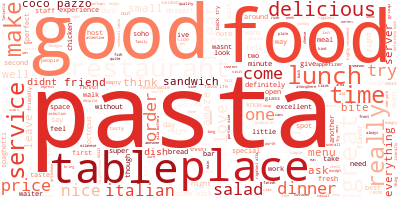

In [37]:
# Join the different processed titles together.
long_string = ','.join(list(coco_pazzo.values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3,colormap="Reds")# contour_color='Reds')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
wordcloud.to_image()

In [210]:
from PIL import Image
import urllib
import requests
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/a/b/e/b/11949840101095620351bowl_of_steaming_soup_01.svg.med.png', stream=True).raw))
#mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/O/i/x/Y/q/P/yellow-house-hi.png', stream=True).raw))

#image_colors = ImageColorGenerator(mask)

In [218]:
def generate_wordcloud(words, mask):
    word_cloud = WordCloud(width = 512, height = 512, background_color='white', colormap="Reds", mask=mask).generate(words)
    plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
    plt.imshow(word_cloud)
    plt.axis('off')
    plt.tight_layout(pad=0)
    plt.show()

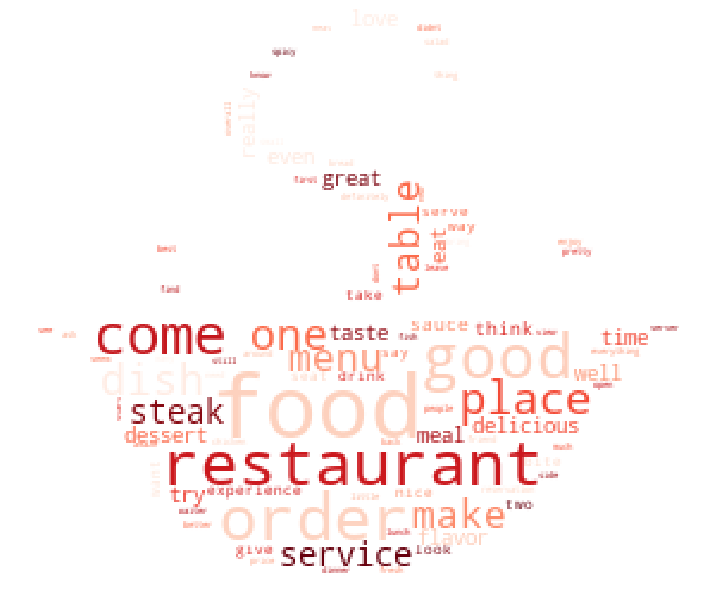

In [219]:
generate_wordcloud(long_string, mask)

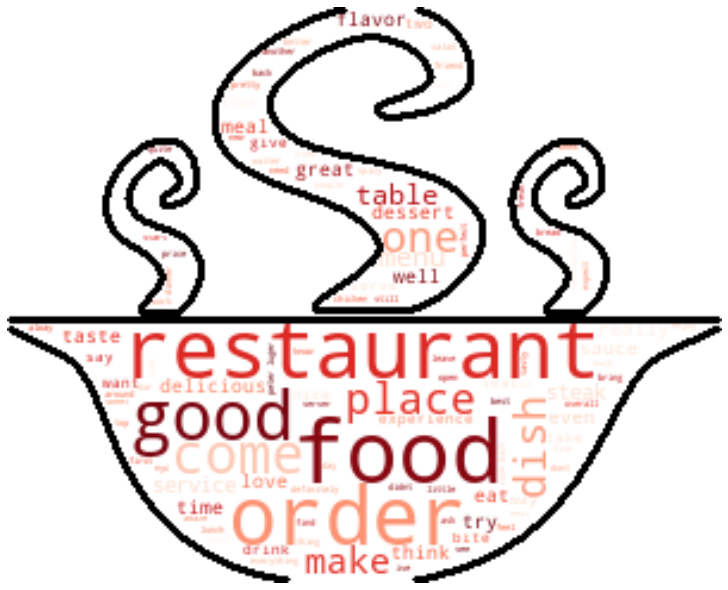

In [213]:
import matplotlib.pyplot as plt
# Join the different processed titles together.
long_string = ','.join(list(combined_df['review'].values))
# Create a WordCloud object
wordcloud = WordCloud(background_color="white", max_words=5000, contour_width=3,colormap="Reds", mask=mask)# contour_color='Reds')
# Generate a word cloud
wordcloud.generate(long_string)
# Visualize the word cloud
#wordcloud.to_image()
plt.figure(figsize=(10,8),facecolor = 'white', edgecolor='blue')
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

## Topic Modelling

In [108]:
count_vect = CountVectorizer(max_df=0.8, min_df=2, stop_words='english')
doc_term_matrix = count_vect.fit_transform(combined_df['review'].values.astype('U'))

In [109]:
doc_term_matrix

<1357x4547 sparse matrix of type '<class 'numpy.int64'>'
	with 77988 stored elements in Compressed Sparse Row format>

In [110]:
LDA = LatentDirichletAllocation(n_components=4, random_state=42)
LDA.fit(doc_term_matrix)

LatentDirichletAllocation(batch_size=128, doc_topic_prior=None,
                          evaluate_every=-1, learning_decay=0.7,
                          learning_method='batch', learning_offset=10.0,
                          max_doc_update_iter=100, max_iter=10,
                          mean_change_tol=0.001, n_components=4, n_jobs=None,
                          perp_tol=0.1, random_state=42, topic_word_prior=None,
                          total_samples=1000000.0, verbose=0)

In [111]:
first_topic = LDA.components_[0]
first_topic
top_topic_words = first_topic.argsort()[-10:]

In [112]:
for i in top_topic_words:
    print(count_vect.get_feature_names()[i])

good
place
experience
bar
course
great
view
restaurant
service
food


In [113]:
for i,topic in enumerate(LDA.components_):
    print(f'Top 10 words for topic #{i}:')
    print([count_vect.get_feature_names()[i] for i in topic.argsort()[-10:]])
    print('\n')

Top 10 words for topic #0:
['good', 'place', 'experience', 'bar', 'course', 'great', 'view', 'restaurant', 'service', 'food']


Top 10 words for topic #1:
['kaya', 'malaysian', 'rice', 'dish', 'come', 'coffee', 'order', 'toast', 'food', 'like']


Top 10 words for topic #2:
['order', 'really', 'make', 'place', 'chicken', 'dish', 'good', 'like', 'come', 'food']


Top 10 words for topic #3:
['wait', 'table', 'place', 'time', 'come', 'make', 'like', 'good', 'order', 'steak']




In [114]:
topic_values = LDA.transform(doc_term_matrix)
topic_values.shape

(1357, 4)

In [115]:
combined_df['Topic'] = topic_values.argmax(axis=1)

In [116]:
combined_df.head(5)

,Unnamed: 0,date,restaurants,review,review_flag,sentiment_score,Topic
0,5.0,12/27/2018,coco-pazzo-new-york-6,hear coco pazzo foodbabynys instagram absolute...,yelp,0.9930,3
1,7.0,12/2/2018,coco-pazzo-new-york-6,love coco pazzo intimate romantic good italian...,yelp,0.9950,2
2,8.0,12/3/2018,coco-pazzo-new-york-6,husband eat first time week restaurant small i...,yelp,0.9757,0
3,10.0,10/8/2018,coco-pazzo-new-york-6,place may pretty pricey lunch time menu amaze ...,yelp,0.9802,2
4,11.0,11/17/2018,coco-pazzo-new-york-6,food great space modern look newly renovate am...,yelp,0.9660,2


In [117]:
topics_yelp = combined_df[combined_df.review_flag == 'yelp']
topics_ny = combined_df[combined_df.review_flag == 'ny']

In [119]:
topics_yelp.Topic.value_counts()

2    451
0    440
3    286
1    161
Name: Topic, dtype: int64

In [120]:
# Merge the 2 tables and calculate the majority topic before and after the review
merged_df_topics = topics_yelp.merge(topics_ny, how = 'inner', left_on = 'restaurants',
                              right_on = 'restaurants', suffixes = ['_yelp','_ny'])
merged_df_topics = merged_df_topics[['Topic_yelp', 'date_yelp', 'restaurants',
       'review_yelp', 'Topic_ny', 'date_ny', 'review_ny']]
merged_df_topics.head()

,Topic_yelp,date_yelp,restaurants,review_yelp,Topic_ny,date_ny,review_ny
0,3,12/27/2018,coco-pazzo-new-york-6,hear coco pazzo foodbabynys instagram absolute...,2,7/31/2018,coco pazzo back eat manhattan idea talk may fl...
1,2,12/2/2018,coco-pazzo-new-york-6,love coco pazzo intimate romantic good italian...,2,7/31/2018,coco pazzo back eat manhattan idea talk may fl...
2,0,12/3/2018,coco-pazzo-new-york-6,husband eat first time week restaurant small i...,2,7/31/2018,coco pazzo back eat manhattan idea talk may fl...
3,2,10/8/2018,coco-pazzo-new-york-6,place may pretty pricey lunch time menu amaze ...,2,7/31/2018,coco pazzo back eat manhattan idea talk may fl...
4,2,11/17/2018,coco-pazzo-new-york-6,food great space modern look newly renovate am...,2,7/31/2018,coco pazzo back eat manhattan idea talk may fl...


In [121]:
merged_df_topics['date_yelp'] = merged_df_topics['date_yelp'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
merged_df_topics['date_ny'] = merged_df_topics['date_ny'].map(lambda x: datetime.strptime(x, '%m/%d/%Y'))
merged_df_topics['flag'] = merged_df_topics['date_yelp'] > merged_df_topics['date_ny']
#merged_df['flag'].str.replace({'True': 'After NY review', 'False': 'Before NY review'})
merged_df_topics.head()

,Topic_yelp,date_yelp,restaurants,review_yelp,Topic_ny,date_ny,review_ny,flag
0,3,2018-12-27,coco-pazzo-new-york-6,hear coco pazzo foodbabynys instagram absolute...,2,2018-07-31,coco pazzo back eat manhattan idea talk may fl...,True
1,2,2018-12-02,coco-pazzo-new-york-6,love coco pazzo intimate romantic good italian...,2,2018-07-31,coco pazzo back eat manhattan idea talk may fl...,True
2,0,2018-12-03,coco-pazzo-new-york-6,husband eat first time week restaurant small i...,2,2018-07-31,coco pazzo back eat manhattan idea talk may fl...,True
3,2,2018-10-08,coco-pazzo-new-york-6,place may pretty pricey lunch time menu amaze ...,2,2018-07-31,coco pazzo back eat manhattan idea talk may fl...,True
4,2,2018-11-17,coco-pazzo-new-york-6,food great space modern look newly renovate am...,2,2018-07-31,coco pazzo back eat manhattan idea talk may fl...,True


In [33]:
# from statistics import mode
# mode_topic = merged_df_topics.groupby(['flag', 'restaurants'])
# mode_topic

In [123]:
merged_df_topics.to_csv('Final_Topics.csv')

In [141]:
new_df = merged_df_topics[merged_df_topics.restaurants != 'babs-new-york']
new_df = new_df[new_df.restaurants != 'frevo-new-york']

In [144]:
#final_topics = merged_df_topics.groupby(['flag', 'restaurants'])[['Topic_yelp', 'Topic_ny']].agg(pd.Series.mode)
#final_topics.sort_values(by = 'restaurants')

from statistics import mode
#merged_df_topics[merged_df_topics.restaurants not in ['babs-new-york', 'frevo-new-york']]
topic_mode = new_df.groupby(['flag', 'restaurants'])[['Topic_ny', 'Topic_yelp']].agg(pd.Series.mode)
topic_mode

Topic_ny Topic_yelp
flag  restaurants                                            
False coco-pazzo-new-york-6                      2          2
      dalongyi-hot-pot-new-york-3                2          2
      fish-cheeks-new-york                       2          2
      gotham-bar-and-grill-new-york              2          0
      kopitiam-new-york                          1          1
      made-nice-new-york-2                       2          2
      manhatta-new-york                          0          0
      peter-luger-brooklyn-2                     3          3
      sen-sakana-new-york                        0          0
      tsismis-new-york                           1          1
      wallse-new-york-8                          0          0
True  bluebird-london-nyc-new-york-4             1          0
      coco-pazzo-new-york-6                      2          2
      dalongyi-hot-pot-new-york-3                2          2
      fish-cheeks-new-york                       2          2
      gotham-bar-and-grill-new-york              2     [0, 2]
      kopitiam-new-york                          1          1
      made-nice-new-york-2                       2          2
      manhatta-new-york                          0          0
      peter-luger-brooklyn-2                     3          3
      sen-sakana-new-york                        0          0
      sugarfish-by-sushi-nozawa-new-york         2          2
      wallse-new-york-8                          0          0

In [146]:
topic_mode.to_csv('topic_mode.csv')

In [149]:
from PIL import Image
import urllib
import requests
mask = np.array(Image.open(requests.get('http://www.clker.com/cliparts/a/b/e/b/11949840101095620351bowl_of_steaming_soup_01.svg.med.png', stream=True).raw))